## Fast GGML with Centroids & Low-Dim

In [ ]:
# import ggml_ot and remaining packages
import sys
sys.path.insert(0, '../src/')
import ggml_ot

import scanpy as sc

/home/kuehn/anaconda3/envs/ggml/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load the scRNA-seq dataset as Anndata

In [2]:
# The examples are done on the Myocardial Infarction dataset from Kuppe et. al, 2022
id = "c1f6034b-7973-45e1-85e7-16933d0550bc.h5ad"
adata = ggml_ot.download_cellxgene(id,load=True)

data/c1f6034b-7973-45e1-85e7-16933d0550bc.h5ad already exists


Fast GGML with
- clusters centroids with probability weights of the proportions of contained cells for each patient, instead of each cell with uniform weight
    - we use `group_by='leiden'` which we perform over the `'X_harmony'` representation to efficiently find distinct clusters
    - the centroids of these clusters can be used in full or highly variable gene space (`use_rep=None`), or in low-dimensional representations as below

- low-dimensional representations, like PCA or Harmony, instead of the full or high variable gene space 
    - we use `use_rep='X_pca'` as PCA can be inverted to relate the learned subspace to the gene space
    - this can be used with cluster and cells (`group_by=None`)

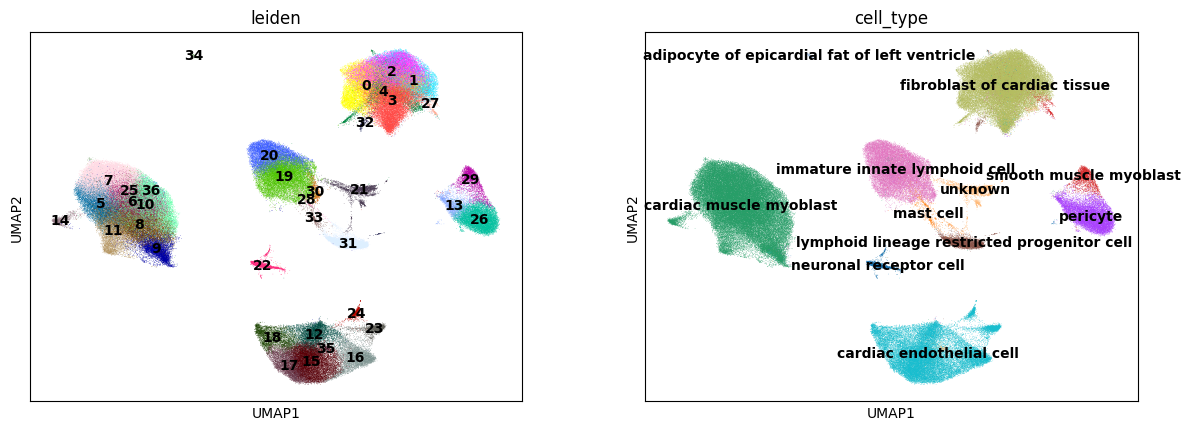

In [3]:
#compute granular clusters as 'cell_type' is too broad to learn any meanigful differences
sc.pp.neighbors(adata,use_rep="X_harmony") 
sc.tl.leiden(adata, flavor="igraph", resolution=2.0) #set iteration=2 to speed up clustering
cell_type = "cell_subtype" if "cell_subtype" in adata.obs.keys() else "cell_type"
sc.pl.umap(adata, color=["leiden",cell_type],legend_loc="on data")

In [4]:
#Use provided interface from Anndata to Pytorch Dataset for Triplet Learning
#n_cells = 0 does not subsample cells. This does not slow down computation as the cells probability mass gets mapped to a fixed number of clusters when setting group_by
train_dataset = ggml_ot.scRNA_Dataset(adata, n_cells = 0, patient_col="sample", label_col="patient_group", use_rep="X_pca", group_by="leiden", subsample_patient_ratio = 0.75, t = 4)

Running GGML with alpha: 10, lambda: 10, rank: 3


100%|██████████| 6/6 [00:09<00:00,  1.53s/it]


Iteration 1 with Loss  341.9118510255103


100%|██████████| 6/6 [00:10<00:00,  1.79s/it]


Iteration 2 with Loss  285.3175682001359


100%|██████████| 6/6 [00:09<00:00,  1.64s/it]


Iteration 3 with Loss  234.64822422405163


100%|██████████| 6/6 [00:09<00:00,  1.61s/it]


Iteration 4 with Loss  188.8610960671018


100%|██████████| 6/6 [00:09<00:00,  1.60s/it]


Iteration 5 with Loss  149.62798689682901
Compute all OT distances after 5 iterations


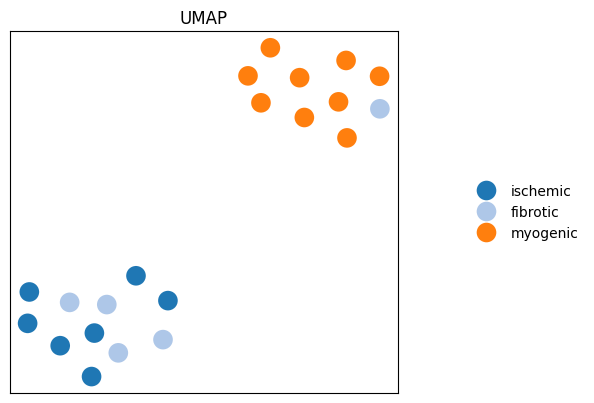

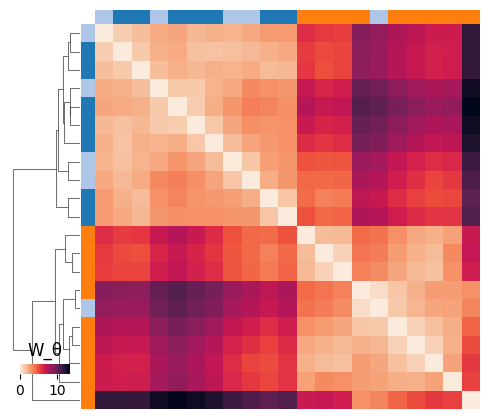

100%|██████████| 6/6 [00:11<00:00,  1.91s/it]


Iteration 6 with Loss  116.71437536788578


100%|██████████| 6/6 [00:13<00:00,  2.31s/it]


Iteration 7 with Loss  91.76302501919636


100%|██████████| 6/6 [00:10<00:00,  1.81s/it]


Iteration 8 with Loss  76.52201069092705


100%|██████████| 6/6 [00:13<00:00,  2.27s/it]


Iteration 9 with Loss  70.22689093170173


100%|██████████| 6/6 [00:15<00:00,  2.66s/it]


Iteration 10 with Loss  66.67609173380058
Compute all OT distances after 10 iterations


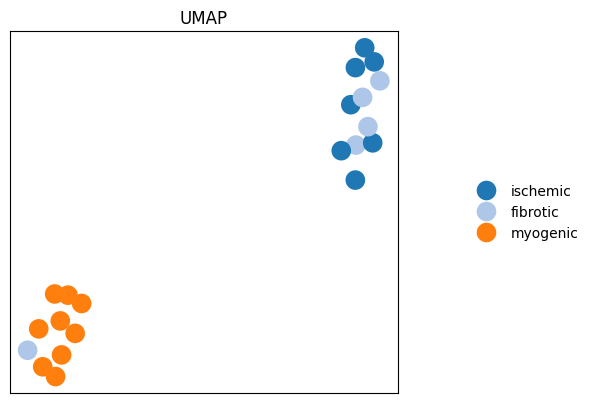

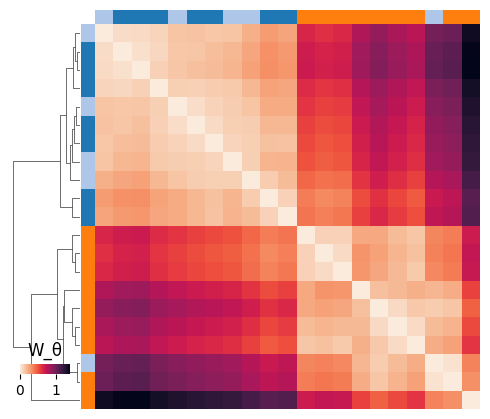

100%|██████████| 6/6 [00:14<00:00,  2.48s/it]


Iteration 11 with Loss  65.23335637393205


100%|██████████| 6/6 [00:15<00:00,  2.56s/it]


Iteration 12 with Loss  65.23905574110648


100%|██████████| 6/6 [00:15<00:00,  2.52s/it]


Iteration 13 with Loss  64.55403285750226


100%|██████████| 6/6 [00:14<00:00,  2.36s/it]


Iteration 14 with Loss  65.20553433055542


100%|██████████| 6/6 [00:14<00:00,  2.47s/it]


Iteration 15 with Loss  64.96491768107624
Compute all OT distances after 15 iterations


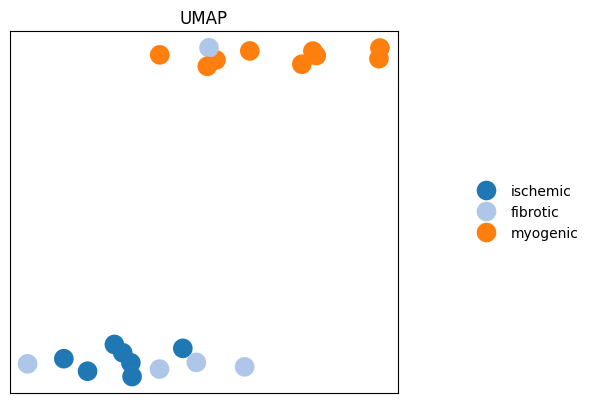

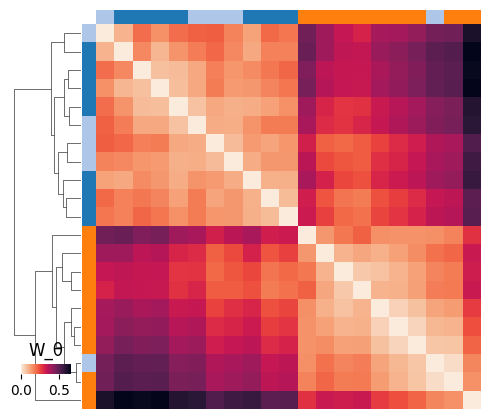

100%|██████████| 6/6 [00:09<00:00,  1.59s/it]


Iteration 16 with Loss  65.38005501587769


100%|██████████| 6/6 [00:12<00:00,  2.16s/it]


Iteration 17 with Loss  65.3085459640324


100%|██████████| 6/6 [00:14<00:00,  2.46s/it]


Iteration 18 with Loss  65.04967179220219


100%|██████████| 6/6 [00:13<00:00,  2.33s/it]


Iteration 19 with Loss  65.44936339228119


100%|██████████| 6/6 [00:12<00:00,  2.03s/it]


Iteration 20 with Loss  64.90437385404293
Compute all OT distances after 20 iterations


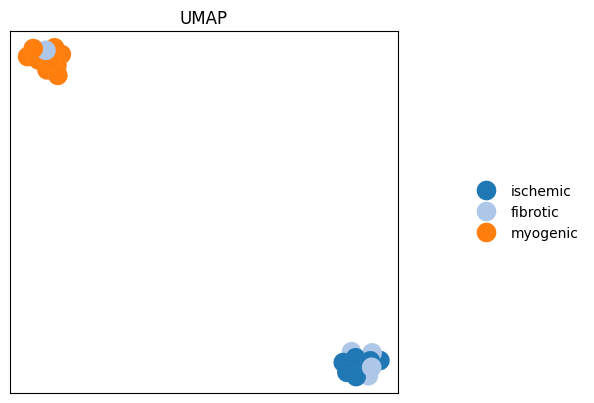

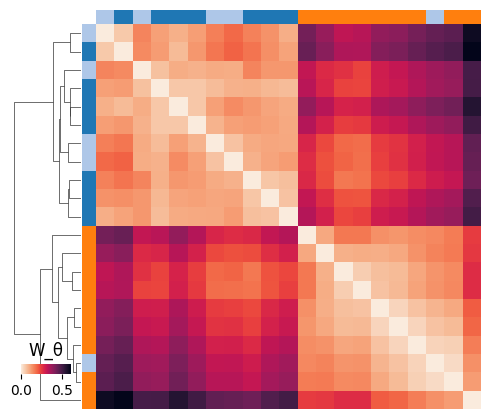

100%|██████████| 6/6 [00:12<00:00,  2.09s/it]


Iteration 21 with Loss  65.3419489858753


100%|██████████| 6/6 [00:12<00:00,  2.01s/it]


Iteration 22 with Loss  65.32686614810616


100%|██████████| 6/6 [00:12<00:00,  2.05s/it]


Iteration 23 with Loss  64.65743508227061


100%|██████████| 6/6 [00:11<00:00,  1.93s/it]


Iteration 24 with Loss  65.15019296935407


100%|██████████| 6/6 [00:12<00:00,  2.08s/it]


Iteration 25 with Loss  65.29077816051445
Compute all OT distances after 25 iterations


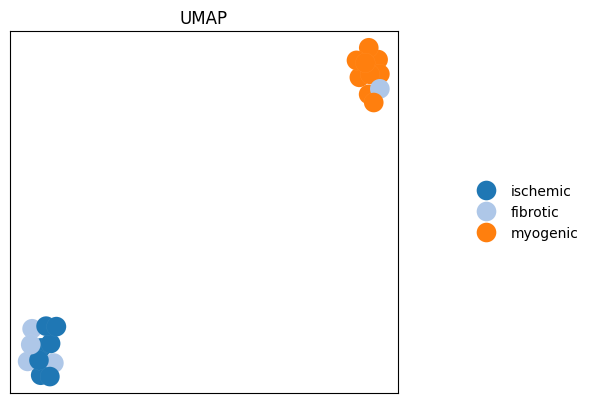

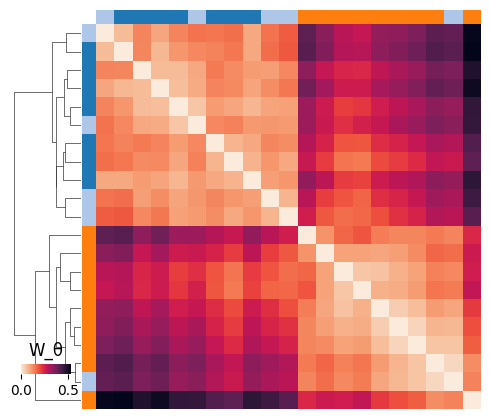

100%|██████████| 6/6 [00:09<00:00,  1.50s/it]


Iteration 26 with Loss  65.39426325810426


100%|██████████| 6/6 [00:07<00:00,  1.33s/it]


Iteration 27 with Loss  65.07883736738309


100%|██████████| 6/6 [00:09<00:00,  1.53s/it]


Iteration 28 with Loss  65.29530500662703


100%|██████████| 6/6 [00:08<00:00,  1.33s/it]


Iteration 29 with Loss  64.92254595218247


100%|██████████| 6/6 [00:08<00:00,  1.38s/it]


Iteration 30 with Loss  65.40446238598744
Compute all OT distances after 30 iterations


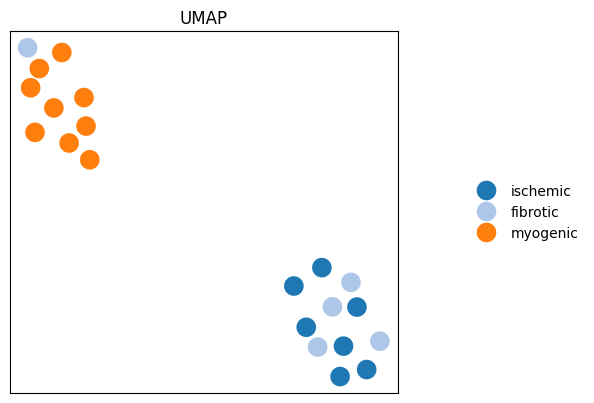

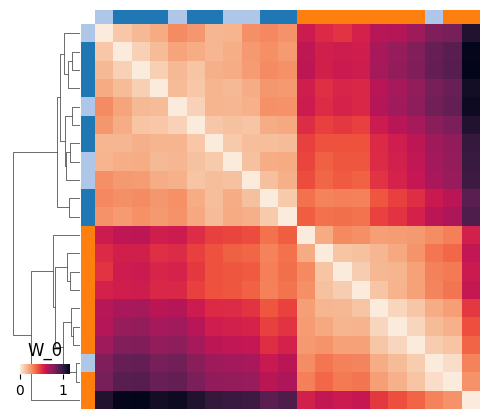

In [5]:
#Train ground metric with GGML
n_threads = 64
trained_adata = ggml_ot.ggml(
    train_dataset, a=10, l=10, k=3, loss="cos", max_iterations=30, plot_i_iterations=5, n_threads= n_threads, adata=adata
)

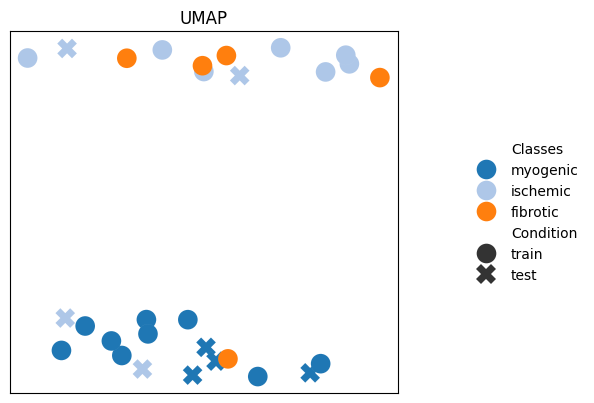

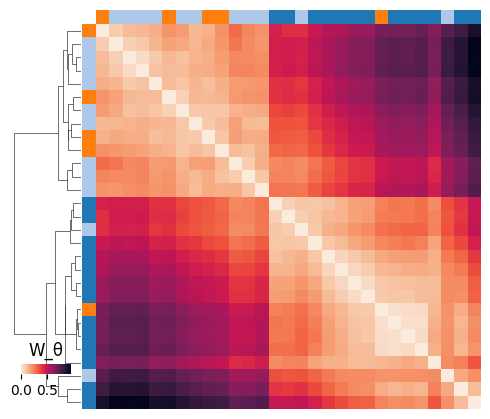

In [6]:
#Test trained weights on full dataset
full_dataset = ggml_ot.scRNA_Dataset(adata, n_cells = 100, patient_col="sample", label_col="patient_group", use_rep="X_harmony", group_by="leiden")
train_symbols = ["train" if p in train_dataset.patient_labels else "test" for p in full_dataset.patient_labels] 
_ = full_dataset.compute_OT_on_dists(w=trained_adata.uns["W_ggml"], plot=True,symbols=train_symbols,n_threads=n_threads)